In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\naslu\OneDrive\Desktop\data sets\portfolio project\Financial Sample.xlsx - Sheet1.csv")

In [7]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",6/1/2014,6,June,2014


# data cleaning

In [8]:
null_values = df.isnull()
null_values.sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
Units Sold               0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [9]:
df.dtypes

Segment                   object
Country                   object
 Product                  object
 Discount Band            object
Units Sold               float64
 Manufacturing Price      object
 Sale Price               object
 Gross Sales              object
 Discounts                object
  Sales                   object
 COGS                     object
 Profit                   object
Date                      object
Month Number               int64
 Month Name               object
Year                       int64
dtype: object

In [10]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [11]:
df.drop(['Month Number',' Month Name ','Year'],axis = 1,inplace = True)

In [12]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",1/1/2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",1/1/2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",6/1/2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",6/1/2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",6/1/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,$ 260.00,$ 300.00,"$ 742,500.00","$ 111,375.00","$ 631,125.00","$ 618,750.00","$ 12,375.00",3/1/2014
696,Small Business,Mexico,Amarilla,High,546.0,$ 260.00,$ 300.00,"$ 163,800.00","$ 24,570.00","$ 139,230.00","$ 136,500.00","$ 2,730.00",10/1/2014
697,Government,Mexico,Montana,High,1368.0,$ 5.00,$ 7.00,"$ 9,576.00","$ 1,436.40","$ 8,139.60","$ 6,840.00","$ 1,299.60",2/1/2014
698,Government,Canada,Paseo,High,723.0,$ 10.00,$ 7.00,"$ 5,061.00",$ 759.15,"$ 4,301.85","$ 3,615.00",$ 686.85,4/1/2014


In [29]:
#changing the data types

df['Units Sold'] = df['Units Sold'].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' Manufacturing Price '] = df[' Manufacturing Price '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' Sale Price '] = df[' Sale Price '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' Gross Sales '] = df[' Gross Sales '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' Discounts '] = df[' Discounts '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df['  Sales '] = df['  Sales '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' COGS '] = df[' COGS '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df[' Profit '] = df[' Profit '].astype(str).str.replace('[^\d.]', '', regex=True).replace('', '0').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

Segment                          object
Country                          object
 Product                         object
 Discount Band                   object
Units Sold                      float64
 Manufacturing Price            float64
 Sale Price                     float64
 Gross Sales                    float64
 Discounts                      float64
  Sales                         float64
 COGS                           float64
 Profit                         float64
Date                     datetime64[ns]
dtype: object

In [15]:
df['Segment'].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

In [16]:
df['Country'].unique()


array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [17]:
df['Country'] = df['Country'].replace('usa', 'USA')


In [18]:
df[' Product '].unique()

array([' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ',
       ' Amarilla '], dtype=object)

# Data analysis and Visualization

In [19]:
#Identifying the Most Profitable Product

product_profit = df.groupby(' Product ')[' Profit '].sum().sort_values(ascending=False)
print(product_profit)


 Product 
 Paseo         5038535.46
 VTT           3278088.02
 Amarilla      3057984.07
 Velo          2556904.97
 Carretera     2289024.89
 Montana       2227807.38
Name:  Profit , dtype: float64


In [43]:
product_sales = df.groupby(' Product ')['  Sales '].sum().sort_values(ascending=False)
product_sales

 Product 
 Paseo         33011143.96
 VTT           20511921.02
 Velo          18250059.47
 Amarilla      17747116.07
 Montana       15390801.88
 Carretera     13815307.89
Name:   Sales , dtype: float64

In [26]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date'],
      dtype='object')

In [27]:
country_sales = df.groupby('Country')[' Gross Sales '].sum()
country_profits = df.groupby('Country')[' Profit '].sum()

highest_sales_country = country_sales.idxmax()
highest_profits_country = country_profits.idxmax()

print(f"Highest Total Sales Country: {highest_sales_country}")
print(f"Highest Total Profits Country: {highest_profits_country}")


Highest Total Sales Country: United States of America
Highest Total Profits Country: France


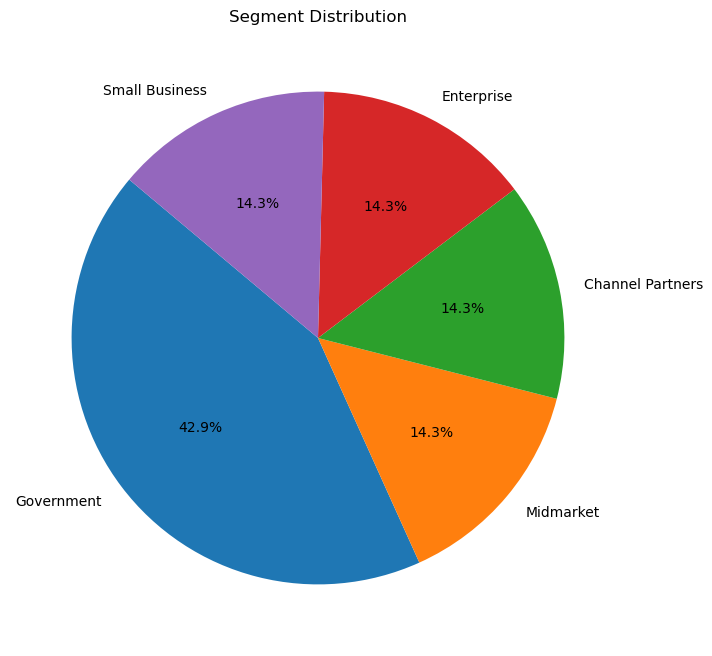

In [58]:
#PIE CHART OF SEGMENT DISTRIBUTION
plt.figure(figsize=(8, 8))
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment Distribution')
plt.show()

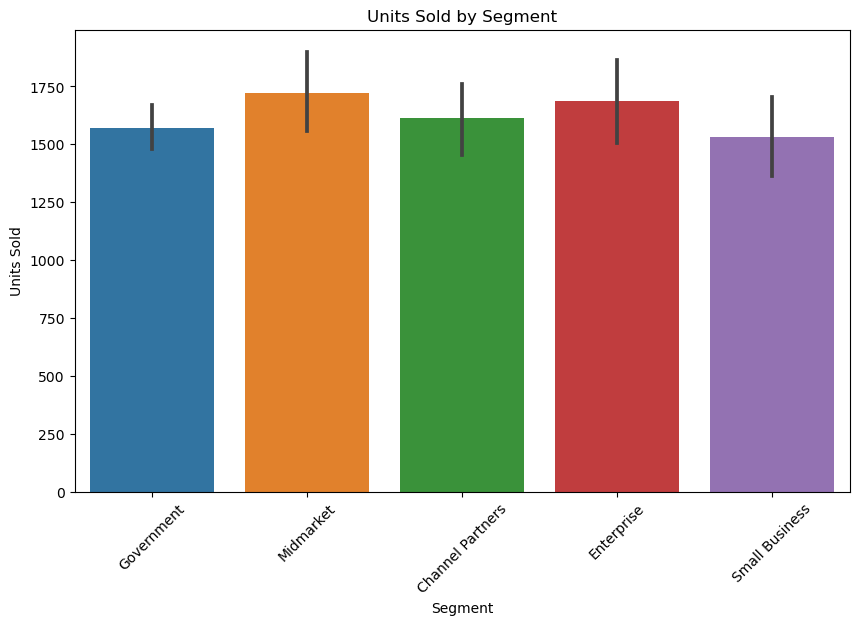

In [59]:
#Bar Plot of Units Sold by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Units Sold', data=df)
plt.title('Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

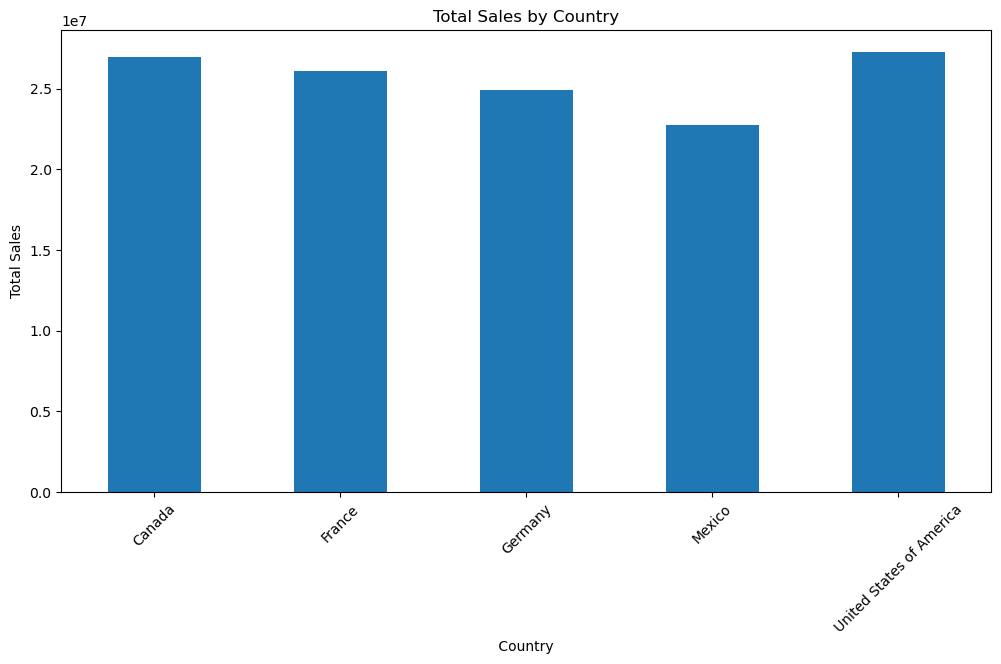

In [30]:
# Plot total sales by country
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', title='Total Sales by Country')
plt.xlabel(' Country ')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

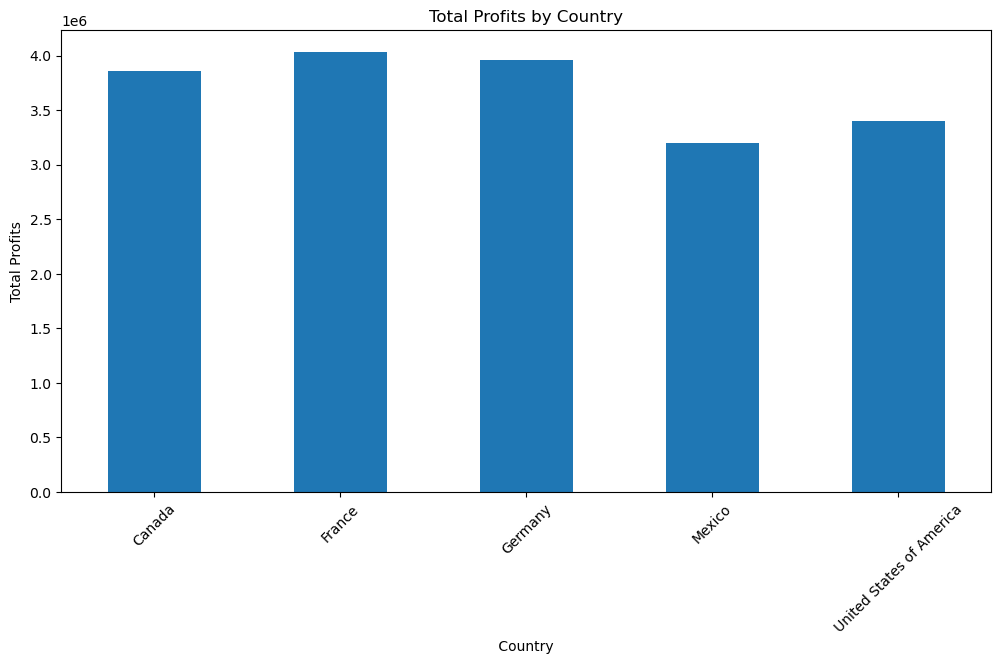

In [38]:
# Plot total profits by country
plt.figure(figsize=(12, 6))
country_profits.plot(kind='bar', title='Total Profits by Country')
plt.xlabel(' Country ')
plt.ylabel('Total Profits')
plt.xticks(rotation=45)
plt.show()

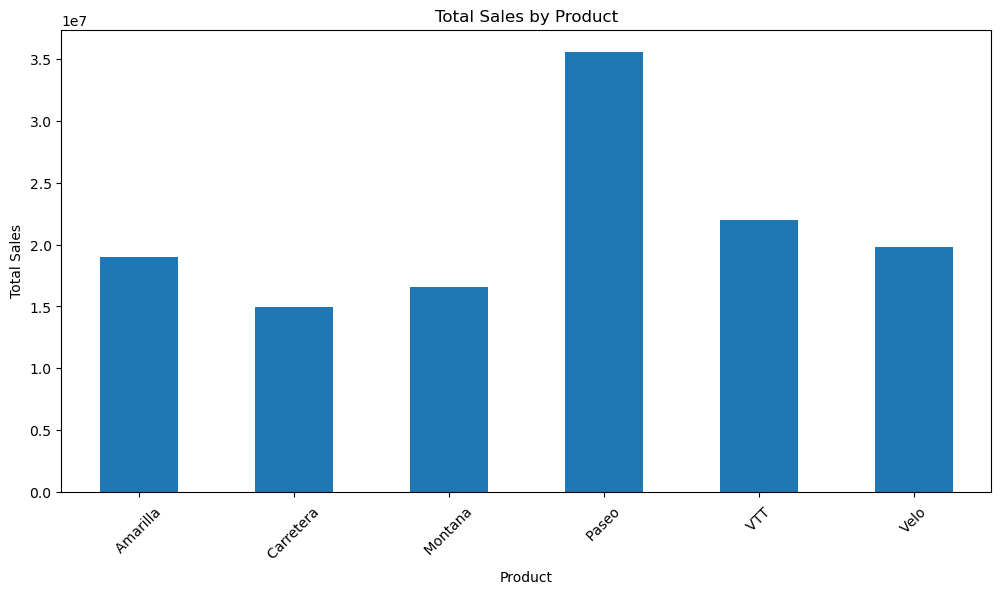

In [52]:
# Calculate total sales by product
product_sales = df.groupby(' Product ')[' Gross Sales '].sum()

# Plot total sales by product
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', title='Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

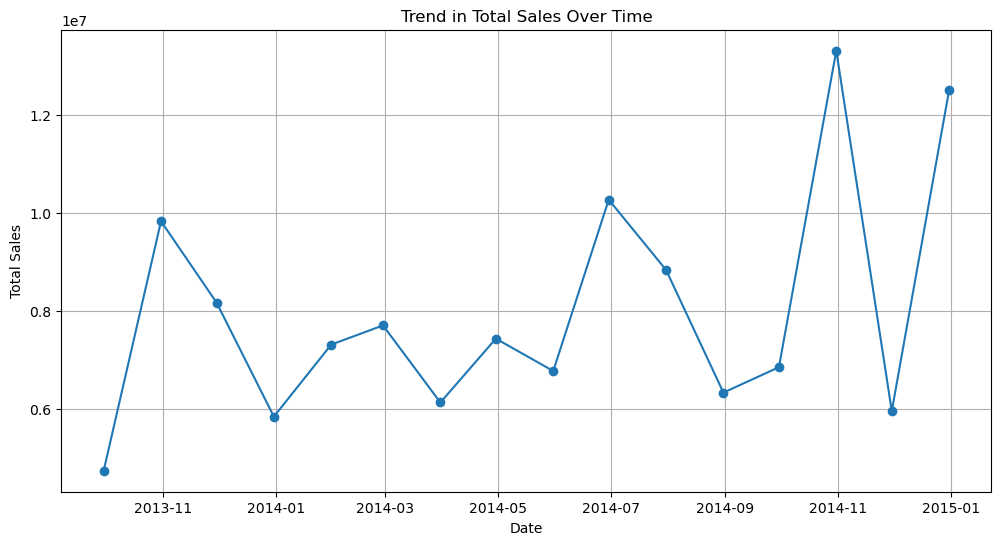

In [53]:
# Group data by Date and calculate total sales
df[' Date '] = pd.to_datetime(df['Date'])
df.set_index(' Date ', inplace=True)
monthly_sales = df[' Gross Sales '].resample('M').sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Trend in Total Sales Over Time')
plt.grid(True)
plt.show()

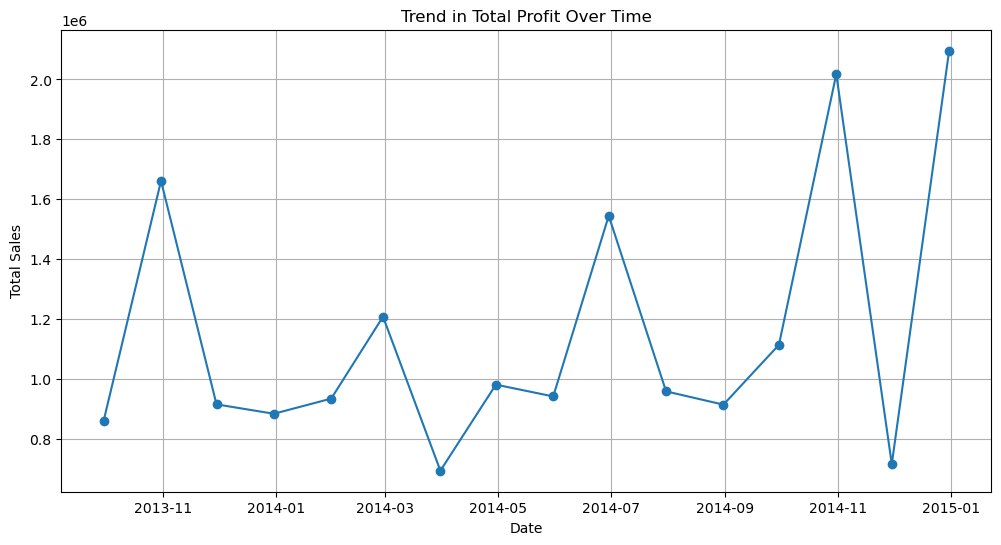

In [55]:
# Group data by Date and calculate total sales
df[' Date '] = pd.to_datetime(df['Date'])
df.set_index(' Date ', inplace=True)
monthly_sales = df[' Profit '].resample('M').sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Trend in Total Profit Over Time')
plt.grid(True)
plt.show()


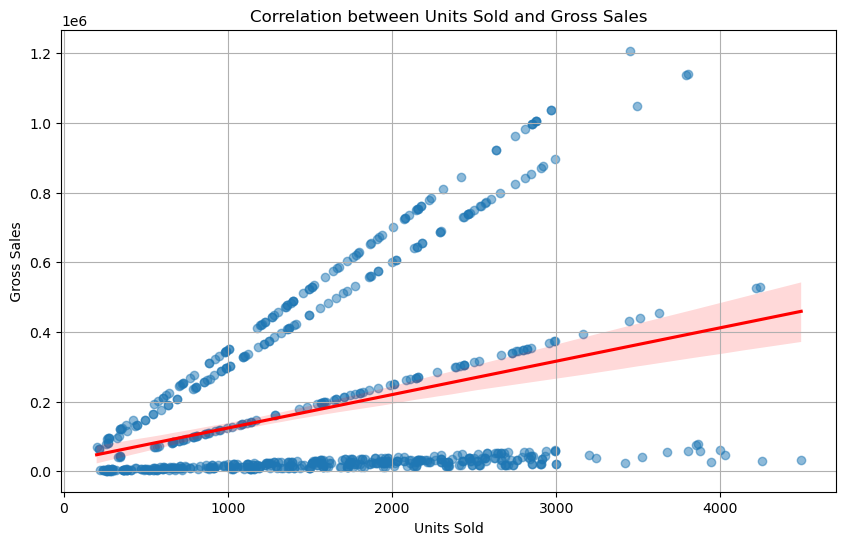

In [57]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Units Sold', y=' Gross Sales ', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Units Sold')
plt.ylabel(' Gross Sales ')
plt.title('Correlation between Units Sold and Gross Sales')
plt.grid(True)
plt.show()

C:\Users\naslu\AppData\Local\Temp\ipykernel_37968\1840952284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


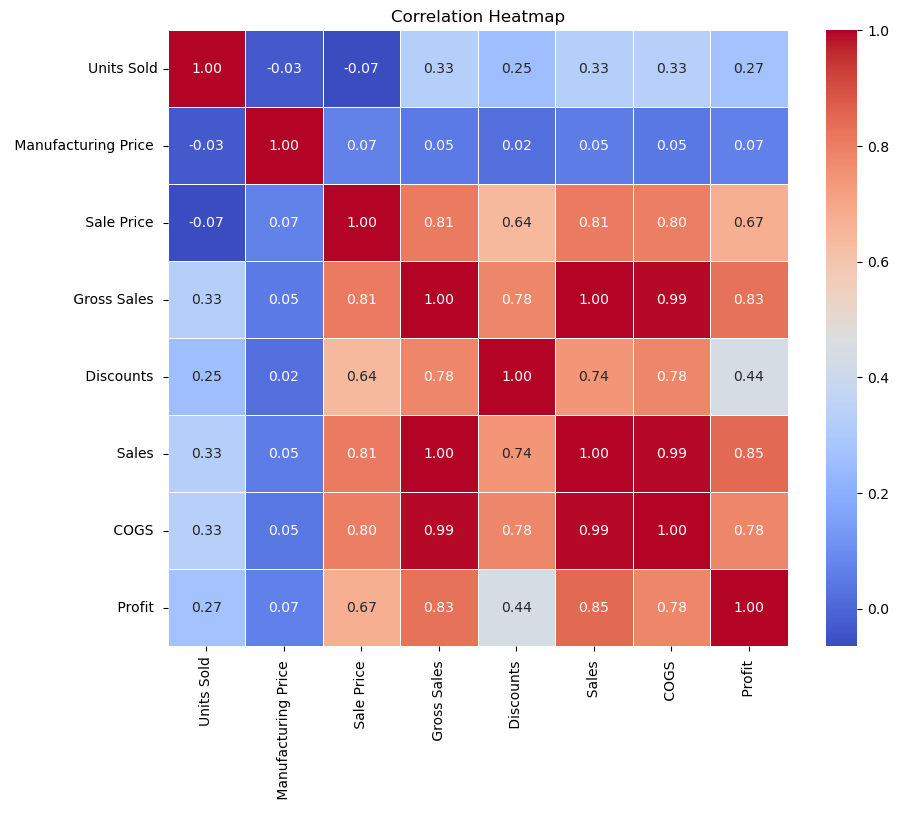

In [64]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

